In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#read files
test = pd.read_csv(r'''C:\Users\casey\Desktop\Coding Practice\Data Scientist 2020 Learning Path\Febuary\Data\loan_project_test_lAUu6dG (1).csv''')
train = pd.read_csv(r'''C:\Users\casey\Desktop\Coding Practice\Data Scientist 2020 Learning Path\Febuary\Data\loan_project_train_ctrUa4K (1).csv''')

#make copies of files
test_original = test.copy()
train_original = train.copy()

# 1 - Understanding the Data

In [2]:
print("Train Columns:\n", train.columns)
print("\nTest Columns:\n", test.columns)

#so train has 12 vars and test has 11. Train has the Loan_Status var, which
# is our target

Train Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Test Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [3]:
print("Train Types:\n\n", train.dtypes)

#Categorical vars:
#Loan_ID, Gender, Married, Dependents, Education,
#Self_Employed, Property_Area and Loan_Status

#Numerical vars:
#ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and
#Credit_History


Train Types:

 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [4]:
train.shape, test.shape

# Train is 614 rows by 13 columns
# Test is 367 rows by 12 columns

((614, 13), (367, 12))

# 2 - Univariate Analysis

In [5]:
# Make a frequency table of the target var Loan_Status (numbers and percents):

print(train['Loan_Status'].value_counts())
print(train['Loan_Status'].value_counts(normalize=True))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


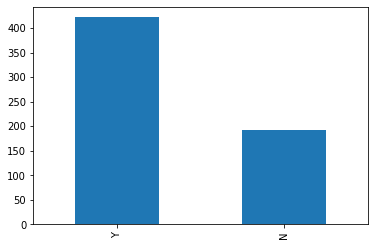

In [6]:
# Make a simple bar plot of target var

train['Loan_Status'].value_counts().plot.bar()

In [7]:
# Visualize each variable seperately:

#Categorical vars - Gender, Married, Self_Employed, Credit_History, Loan_Status
#Ordinal vars (some order) - Dependents, Education, Property_Area
#Numerical vars - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

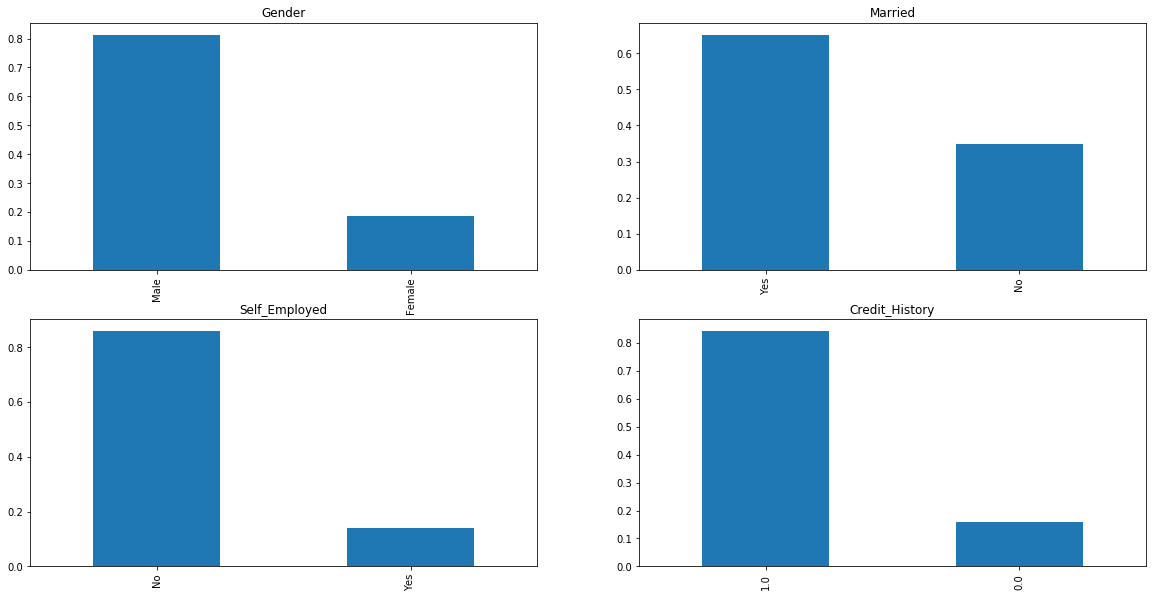

In [8]:
#Visualize Categorical Vars:

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= "Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= "Self_Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= "Credit_History")


# so, of the applicants, (80% male, 20% female), (65% married, 35% not married),
# (15% self employed, 85% not self employed), (85% repaid debts, 15% didn't)

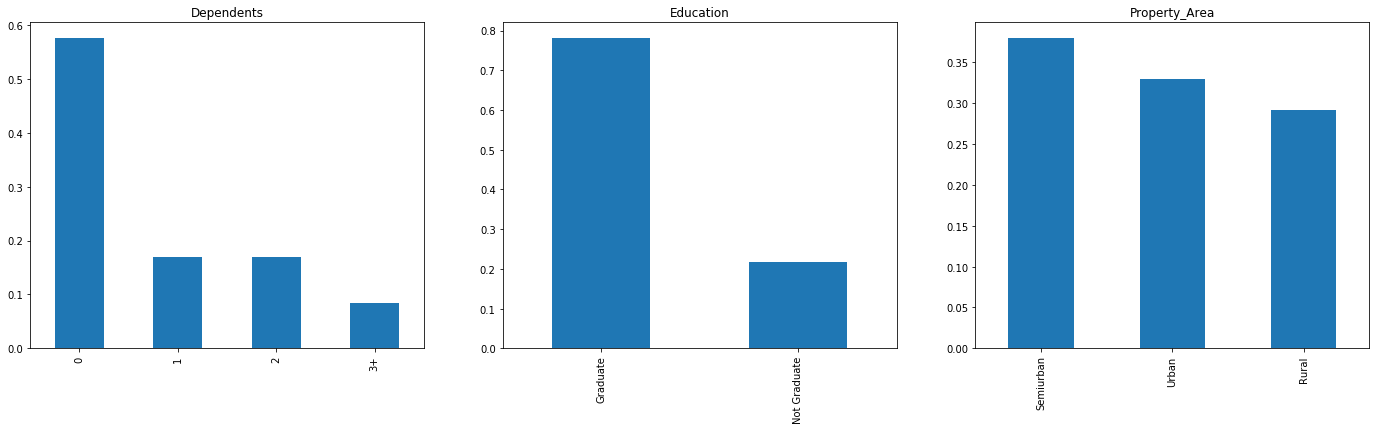

In [9]:
# Visualize Ordinal Vars
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

#SO:
# - most applicants don't have any dependents
# - about 80% of applicants are graduates
# - most applicants are from a Semiurban area (but not by much)

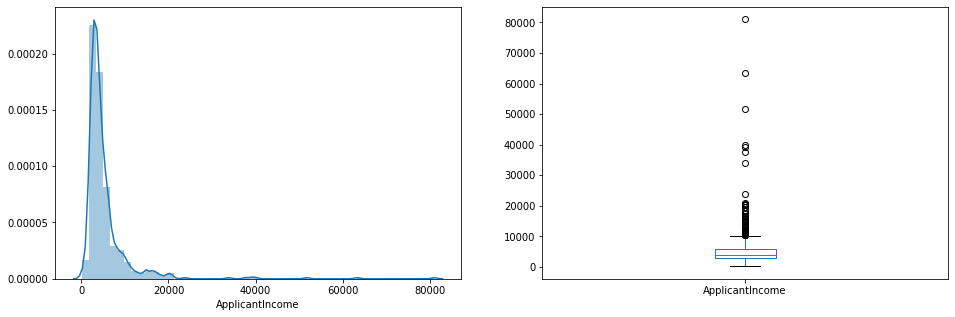

In [10]:
# Visualize numerical vars: look at ApplicantIncome

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

# This shows that the distribution is skewed left a lot, and there are a lot of
# outliers (might have to do with income disparity from education levels)

Text(0.5, 0.98, '')

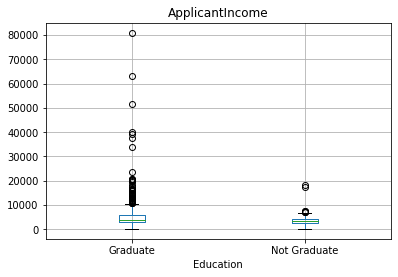

In [11]:
# Redo box plot for ApplicantIncome, but separated by education:

train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

# Yeah, a lot of the outliers are graduates, and only a few aren't

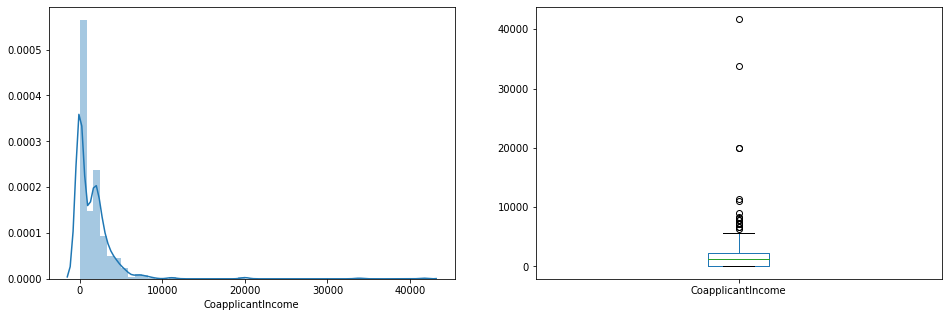

In [12]:
# Now CoapplicantIncome distribution:

plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

# - Similar distribution to ApplicantIncome, very far left
# - majority of incomes range from 0 to 5000
# - not as many outliers, but still a lot

# 3 - Bivariate Analysis

In [13]:
# Previous hypostheses about data:
# - Higher income = higher chances of approval
# - Applicant who repaid debts (Credit History) = higher chances of approval
# - Lower Loan Amount = higher chances of approval
# - Lower monthly payments to repay the loan = higher chances of approval

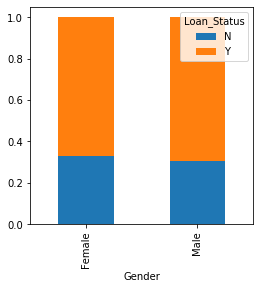

In [14]:
# Categorical Independent Var vs Target Var

Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# We can see from this that males and females have around the same approval rating

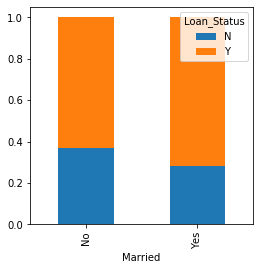

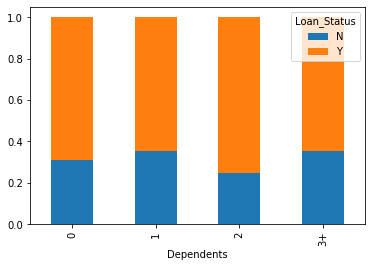

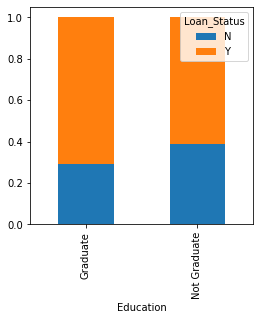

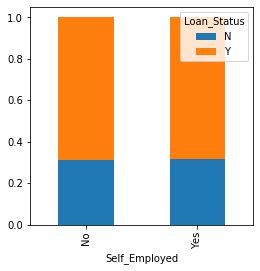

In [15]:
# Now to check 4 more categorical vars:

Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 


Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

# This shows:
# - Approval rating higher for married vs unmarried
# - Approval rating for 1 or 3+ dependents is similar, and rating for 0 or 2 is better
# - Approval rating higher for graduates vs not graduates
# - Approval rating unaffected by self-employed or not

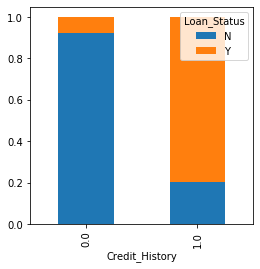

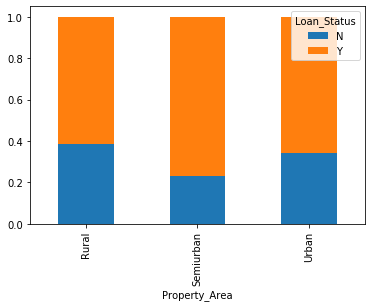

In [16]:
# And now the last categorical vars: Credit History and Property Area

#Step 1: crosstab with each var and Loan status
# varname = pd.crosstab(dfname['varname'], dfname['targetvarname'])

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

#Step2: make stacked plots of them that go up to 1.0:
# varname.div(varname.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# plt.show()

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

# This shows:
# Credit History has a massive Impact on loan status (0.0=90% no, 1.0 = 20% no)
# Semiurban area has higher portion of loans approved than rural or urban

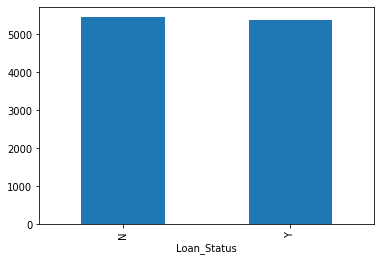

In [17]:
# Numerical Indenpendent Var vs Target Var:
# First we'll try to find mean income of those who got loans approved vs
# those who didn't

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

#looks like there isn't much of a difference so far

Text(0, 0.5, 'Percentage')

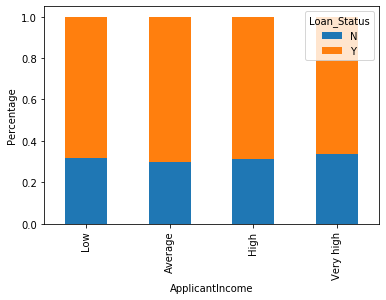

In [18]:
# Let's make bins for different income levels and analyze loan status for each bin

bins=[0,2500,4000,6000,81000] 
group=['Low', 'Average', 'High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

# This tells us that applicant income doesn't actuall affect loan approval
# This contradicts our hypothesis (higher income = higher approval chance)

Text(0, 0.5, 'Percentage')

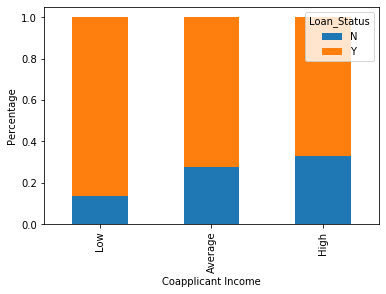

In [19]:
# Now to check co-applicant income:

bins=[0,1000,3000,42000] 
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

# This shows that low coapplicant income actually gives higher approval
# This might be wrong, since a lot of applicants have 0 for co-ap income
#

Text(0, 0.5, 'Percentage')

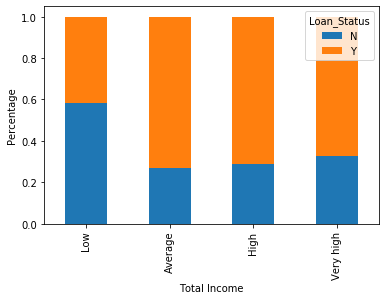

In [20]:
# Let's combine co-app and app income into a total income to look at:

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

# This shows that low income has much lower chance of approval
# Also avg, high, and very high incomes have around the same chances

Text(0, 0.5, 'Percentage')

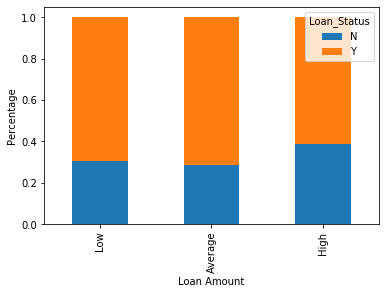

In [21]:
# Now to visualize the LoanAmount Variable:
bins=[0,100,200,700] 
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

# This shows that high loan amount have lower approval chances then low or avg
# This supports our hyposthesis (lower loan amount = higher approval chance)


In [22]:
# Let's drop all these bins to clear up train
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [23]:
# Now let's replace the Loan Status with numbers (N=0, Y=1), and replace the 3+ in dependents with just 3
# For loan status we only have to do this for train, but for dependents we have to do it for both
train['Dependents'].replace('3+', 3, inplace=True) 
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

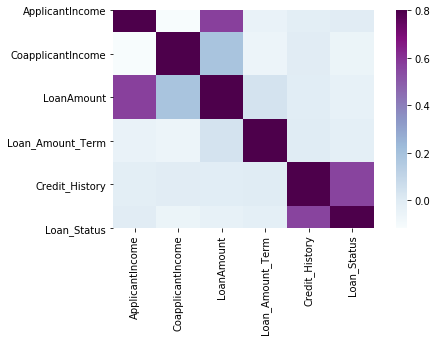

In [24]:
# Now to use a heatmap to visualize all numerical val correlations at once

matrix = train.corr()
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

# This shows:
# - Loan status and Credit history are strongly correlated
# - Applicant Income and Loan Amount are strongly correlated
# - Coapplicant Income and Loan Amount are somewhat correlated
# - Everything else is weakly correlated

# 4 - Missing Value and Outlier Treatment

In [25]:
# Missign Vals:

# First we'll see how man values are missing in each group
train.isnull().sum()

# So, there are missing vals in gender, married, dependents, self employed,
# loan amount, loan amount term, and credit history

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# We'll treat the missing vals one group at a time
# For numerical vars: imputation using mean or median
# For categorical vars: imputation using mode

In [27]:
# For most categorical vars, there aren't that many missing vals, so we'll just use mode to replace them
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [28]:
# For loan amount term, which is technically numerical, we'll look at the value counts
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
# This shows that 360.0 is the most common term by far
# So we'll replace missing vals for loan amount term using mode as well
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [30]:
#Now for LoanAmount, we'll probably want to use median to fill missing vals,
# since we saw a bunch of outliers in LoanAmount earlier

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [31]:
# Now to check and see if we've filled everything in:
train.isnull().sum()

# Looks like we're good

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
# Let's quickly fill the test dataset with all the same stuff

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [33]:
# Now to deal with the outliers:
# First, remember: outliers change only some of the data descriptions
# Ex: a massive number at the end of a list of small numbers would change the
# mean and standard deviation a lot, but the median wouldn't change at all


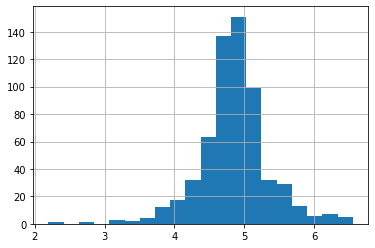

In [34]:
# Simplest solution is just a log transform to make distribution more normal
# Log transform has little effect on small numbers, but a huge effect on big ones

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Now the data looks much more evenly distributed

In [35]:
#Now to make a logistic regression model and make predictions 
# for the test dataset

# 5 - Model Building - Logisitic Regression

In [36]:
# First lets drop LoanID cause it has nothing to do with approval chance
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [37]:
# Now to use scikit-learn(sklearn) - one of the best librariers for modeling

#First, scikit learn requires the target var to be in a separate datset
#so lets move it

X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [38]:
# Now to make dummy vars to turn categorical vars into 1s and 0s:
#this is so the logistic regression model can read them properly

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [39]:
# We're gonna use scikit learn to split our train dataset
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)

In [40]:
# That divided the dataset into 2 parts: training and validation
# Now lets import LogisticRegression and accuracy_score from sklearn and
# fit the regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Now let's predict the Loan Status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)
pred_cv

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
# Let's calculate how accurate our predictions are by calculating accuracy
accuracy_score(y_cv,pred_cv)

0.8378378378378378

In [43]:
# Now lets make predictions for the test dataset
pred_test = model.predict(test)

In [44]:
# import the sample submission file for the solution checker
submission = pd.read_csv(r'''C:\Users\casey\Desktop\Coding Practice\Data Scientist 2020 Learning Path\Febuary\Data\loan_project_sample_submission_49d68Cx (2).csv''')

In [45]:
# We only need the Loan_ID and the corresponding Loan_Status for the final
# submission. We'll fit these columns with the Loan_ID of the test dataset and
# the pred_test predictions we made
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [46]:
# Don't forget, we gotta convert the Loan status back to Y and N

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [47]:
# Finally we'll convert the submission into the .csv format and submit it
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

# Note: pd.DataFrame.to_csv puts the file in the same folder as this Jupyter Notebook file
# Note: the logistic.csv file needs column A removed to be ordered properly

# 6 - Logistic Regression using Stratified k-folds  - Cross Validation

In [48]:
# Validation is just a technique where reserve a sample of the data without 
# training it and use it later

# Forms of validation include: validation set approach, k-fold cross validation
# , leave one out cross validation (LOOCV), and stratified k-fold cross validation

In [49]:
#Stratified k-fold cross validation:
#stratification - process of rearranging data to make sure each fold is a good
# representation of the whole (ex: in a binary classification problem with
# each class representing 50% of data, its best to arrange data so that with
# every fold, each class is about half the instances)
#Stratified k-fold is generally better when dealing with bias and variance

In [50]:
#Import StratifiedKFold from sklearn:
from sklearn.model_selection import StratifiedKFold

# Making a cross validation logistic model with 5 stratified folds
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score', score)
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.8064516129032258

2 of kfold5
accuracy_score 0.8064516129032258

3 of kfold5
accuracy_score 0.8114754098360656

4 of kfold5
accuracy_score 0.7950819672131147

5 of kfold5
accuracy_score 0.8360655737704918


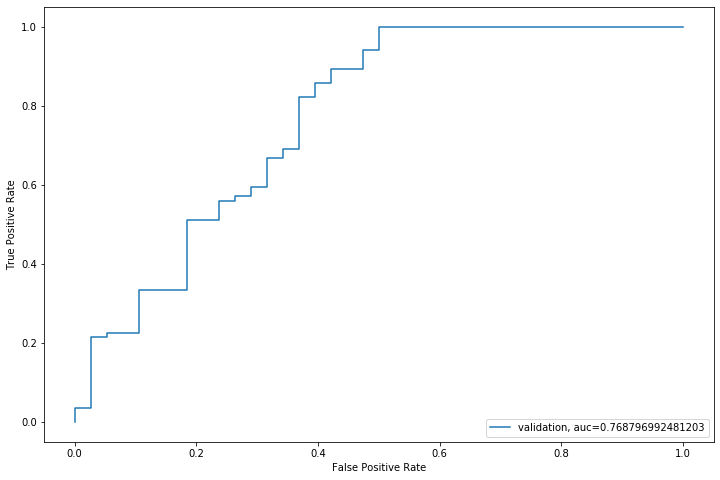

In [51]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

In [52]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

#This ended up getting us the same accuracy as before

# 7 - Feature Engineering

In [53]:
# We can come up with new features that might affect the target var:
# 1 - total income (app income+coapp income), high total income = high approval
# 2 - EMI (loanamount / loanamounterm) - monthly payments to pay off loan
# 3 - Balence Income - income left after moonthly payments made

train['Total_Income'] = train["ApplicantIncome"] + train['CoapplicantIncome']
test['Total_Income'] = test["ApplicantIncome"] + test['CoapplicantIncome']

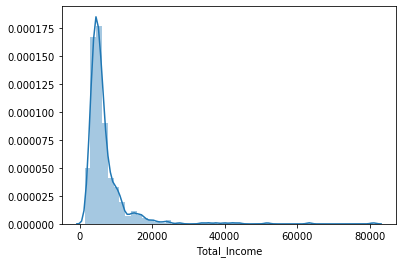

In [54]:
# Let's look at distribution of totla income:
sns.distplot(train['Total_Income']);

#Looks shifted towards the left (aka right skewed)

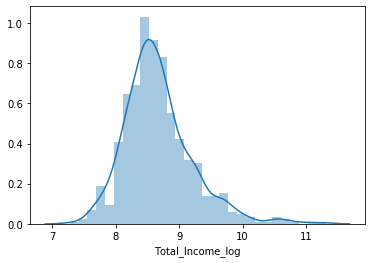

In [55]:
# So lets take the log transform to normalize distribution
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

sns.distplot(train['Total_Income_log']);

#much more normal

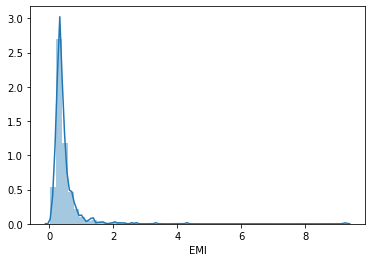

In [56]:
# Now let's do the same for EMI:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']
sns.distplot(train['EMI']);

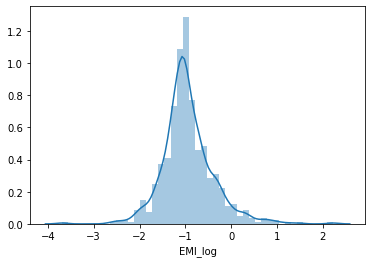

In [57]:
#log transform EMI:
train['EMI_log'] = np.log(train['EMI'])
test['EMI_log'] = np.log(test['EMI'])

sns.distplot(train['EMI_log']);

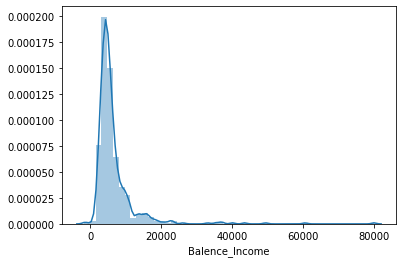

In [58]:
# and now balance income:
train['Balence_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balence_Income'] = test['Total_Income'] - (test['EMI']*1000)
sns.distplot(train['Balence_Income']);


In [59]:
# Now we have to remove the variable that created these features
# this is becuase correlation between these vars are high, and logistic
# regression assumes they aren't correlated. Also to remove noise from dataset

train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# 8 - Model Building Part II

In [60]:
# Here, we're gonna build 4 models: Logistic Regression, Decision Tree, 
# Random Forest, and XGBoost

In [61]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [62]:
# Logistic Regression:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
    
    #This wasn't working, but it doesn't give a better result than before


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


In [63]:
# Decision tree - supervides learning algorithm (w/ predefined target var)
#     - mostly used in classification problems
#     - in this, we split the population or sample into two or more homogeneuos
#       sets (sub-populations) based on most significant splitter in input vars

#Starts with:
from sklearn import tree

In [64]:
train.isnull().sum()

Credit_History             0
Loan_Status                0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Total_Income               0
Total_Income_log           0
EMI                        0
EMI_log                    0
Balence_Income             0
dtype: int64

In [65]:
# Make decision tree

i = 1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7741935483870968

2 of kfold 5
accuracy_score 0.717741935483871

3 of kfold 5
accuracy_score 0.680327868852459

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7131147540983607
